<h2><center> Welcome to the UmojaHack Africa 2023 Cryptojacking Detection Challenge Starter Notebook</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?export=view&id=1afxycLZz1AovI0MjqEIiXyziEVWnUkNG" width = "750" height = '500' alt="Cryptojacking Detection Challenge"/>

*About the problem*
> Cryptojacking is a cyber-attack utilizing malicious scripts similar to those from large cryptocurrency houses to illegally mine data without users being aware. These attacks are stealthy and difficult to detect or analyze, often leading to decreased computing speeds for users as well as crashes due to straining of computational resources.


*The objective of this challenge is*:
> classify network activity from various websites as either cryptojacking or not based on features related to both network-based and host-based data.



## Table of contents:

1. [Importing Libraries](#Libraries)
2. [Loading Data](#Data)
3. [Statistical Summaries](#Statistics)
4. [Missing Values and Duplicates](#Missing)
5. [Target Distribution](#Distribution)
6. [Feature Engineering](#Feature)
7. [Modelling](#Preprocess)

<a name="Libraries"></a>
## 1. Importing Libraries


In [1]:
SEED = 1221
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

<a name="Data"></a>
## 2. Loading Data

In [2]:
!unzip "/content/umojahack-africa-2023-intermediate-challenge.zip" -d "/content/data"

unzip:  cannot find or open /content/umojahack-africa-2023-intermediate-challenge.zip, /content/umojahack-africa-2023-intermediate-challenge.zip.zip or /content/umojahack-africa-2023-intermediate-challenge.zip.ZIP.


In [5]:
# Load files
train = pd.read_csv('content/data/Train.csv')
test = pd.read_csv('content/data/Test.csv')
samplesubmission = pd.read_csv('content/data/SampleSubmission.csv')

# Preview train dataset
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


### Variables definitions :
<strong>'I/O Data Operations'</strong> =  Speed at which the process is issuing read and write I/O operations

<strong>'I/O Data Bytes'</strong> = Speed at which the process is reading and writing bytes in I/O operations

<strong>'Number of subprocesses'</strong> = Number of sub-processes that are currently active in a parent process

<strong>'Time on processor'</strong> = The total time, in seconds, that a process has been running

<strong>'Disk Reading/sec' </strong>= Speed of disk reading operations

<strong>'Disc Writing/sec' </strong>= Speed of writing operations to disk

<strong>'Bytes Sent/sent' </strong>= The rate at which bytes leave the browser’s HTTP requests

<strong>'Received Bytes (HTTP)'</strong> = Speed of bytes arriving to the browser’s HTTP responses

<strong>'Network packets sent'</strong> = Speed of sending packets in the TCP protocol

<strong>'Network packets received' </strong>= Packet reception speed over the TCP protocol

<strong>'Confirmed byte radius' </strong>= The ratio of Memory/Bytes committed and Memory/Confirmation limit

<strong>'Pages Read/sec'</strong> = Speed rate at which the disk was read in order to resolve hard page errors

<strong>'Pages Input/sec' </strong>= Speed at which pages are written to disk to free up space in physical memory

<strong>'Page Errors/sec'</strong> = This is the average number of pages with faults per second

In [10]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((8908, 16), (3818, 15), (3818, 2))

<a name="Statistics"></a>
## 3. Statistical Summaries

In [11]:
# Train statistical summary
train.describe(include = 'all')

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
unique,8908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_4W8AP96UO6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,NaN,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,NaN,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,NaN,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,NaN,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,NaN,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000


In [12]:
train.columns

Index(['ID', 'I/O Data Operations', ' I/O Data Bytes',
       'Number of subprocesses', 'Time on processor', 'Disk Reading/sec',
       'Disc Writing/sec', 'Bytes Sent/sent', 'Received Bytes (HTTP)',
       'Network packets sent', 'Network packets received', 'Pages Read/sec',
       'Pages Input/sec', 'Page Errors/sec', 'Confirmed byte radius', 'Label'],
      dtype='object')

<a name="Missing"></a>
## 4. Missing Values and Duplicates

In [14]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [15]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

There are no missing values or duplicates

<a name="Distribution"></a>
## 5. Target Distribution

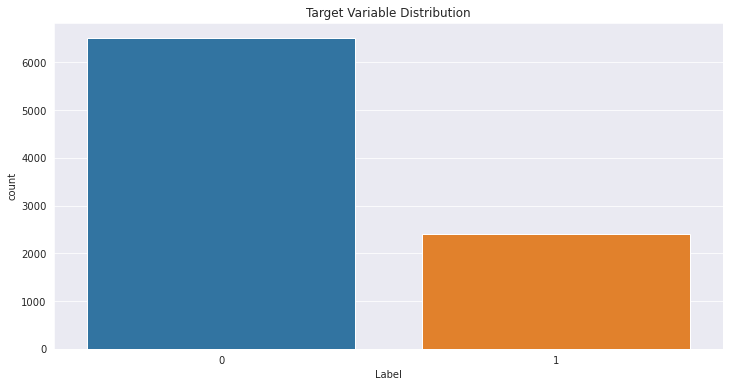

In [20]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train)
plt.title('Target Variable Distribution')
plt.show()

There is a class imbalance in our dataset

/tmp/ipykernel_12680/3209112519.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


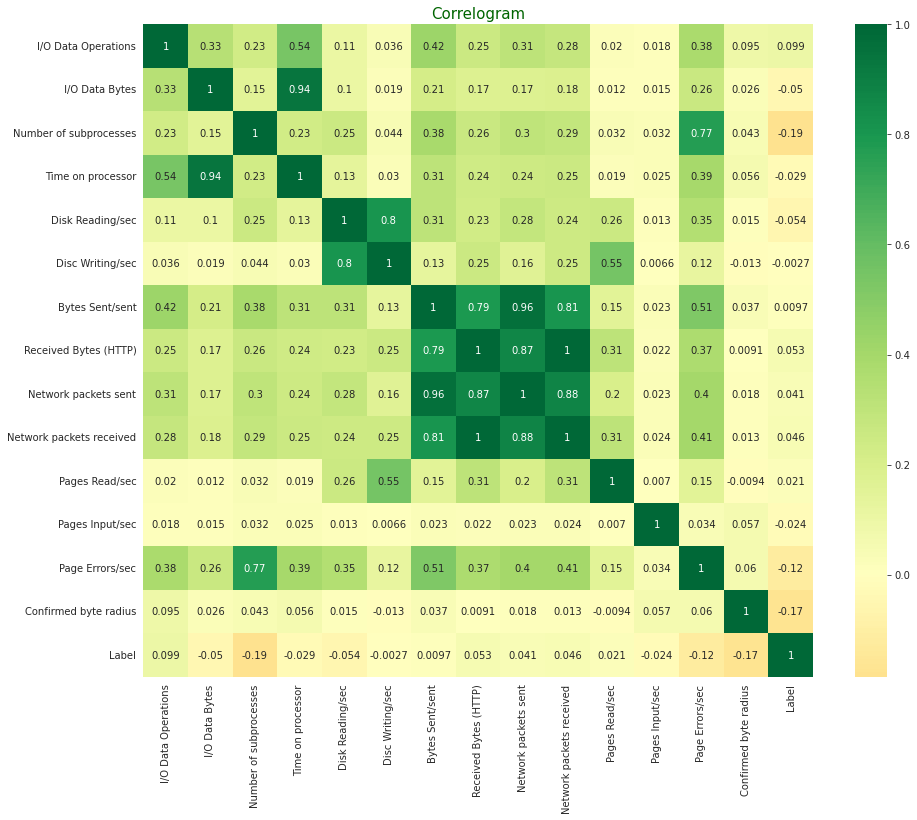

In [21]:
# Plotting a heatmap to show correlations between variables
corr = train.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [34]:
df=train[['Number of subprocesses', 'Label']].groupby(['Number of subprocesses']).mean()
df[df.Label == 1 ]  , df[df.Label == 0 ]

(                        Label
 Number of subprocesses       
 2.000000                  1.0
 6.000000                  1.0
 7.000000                  1.0
 28.034714                 1.0,
                         Label
 Number of subprocesses       
 1.000000                  0.0
 23.000000                 0.0
 30.407359                 0.0
 30.516591                 0.0
 50.000000                 0.0
 51.000000                 0.0)

<a name="Feature"></a>
## 6. Feature Engineering

In [179]:
def Add_features(df):
    
    df['CPU Usage'] = df['Time on processor'] / df['Number of subprocesses']
    df['Disk Usage'] = (df['Disk Reading/sec'] + df['Disc Writing/sec']) / (df['Time on processor']+0.001)
    df['Packet Size Ratio'] = (df['Bytes Sent/sent'] + df['Received Bytes (HTTP)']) / (df['Network packets sent'] + df['Network packets received']+0.001)
  # Feature 2: Disk Utilization
    df['Disk Utilization'] = df['Disk Reading/sec'] + df['Disc Writing/sec']
    df['CPU Utilization'] = df['Time on processor'] / (df['Confirmed byte radius']+0.001)

  # Feature 3: Network Utilization
    df['Network Utilization'] = df['Bytes Sent/sent'] + df['Received Bytes (HTTP)'] + df['Network packets sent'] + df['Network packets received']

  # Feature 4: Page Faults
    df['Page Faults'] = df['Pages Read/sec'] + df['Pages Input/sec'] + df['Page Errors/sec']
    df['Network Latency'] = (df['Pages Read/sec'] + df['Pages Input/sec'] + df['Page Errors/sec']) / (df['Network packets sent']+0.001)
  
  # Feature 5: Average Confirmed Byte Radius
    df['Average Confirmed Byte Radius'] = df['Confirmed byte radius'] / df['Number of subprocesses']
    df['I/O Data Ratio'] = df['I/O Data Operations'] / (df[' I/O Data Bytes'] +0.001)
    df['Total I/O Data'] = df['I/O Data Operations'] * df[' I/O Data Bytes']

  # Feature 6: Disk I/O Ratio
    df['Disk I/O Ratio'] = df['Disk Reading/sec'] / (df['Disc Writing/sec']+0.001)

  # Feature 7: Network Packets Ratio
    df['Network Packets Ratio'] = df['Network packets sent'] / (df['Network packets received']+0.001)

  # Feature 8: Memory Bytes Ratio
    df['Memory Bytes Ratio'] = df['Received Bytes (HTTP)'] / (df['Confirmed byte radius']+0.001)
    df['Network Bytes Ratio'] = df['Bytes Sent/sent'] / (df['Received Bytes (HTTP)']+0.001)

  # Feature 9: Disk Activity Ratio
    disk_ratio = df['Disk Reading/sec'] / (df['Disc Writing/sec']+0.001)
    memory_ratio = df['Pages Read/sec'] / (df['Pages Input/sec']+0.001)
    df['Disk Activity Ratio'] = disk_ratio + memory_ratio

  # Feature 10: Network Packets Size Ratio
    df['Network Packets Size Ratio'] = df['Bytes Sent/sent'] / (df['Network packets sent']+0.001)

  # Feature 11: I/O Bytes Ratio
    df['I/O Bytes Ratio'] = df[' I/O Data Bytes'] / (df['Confirmed byte radius']+0.001)
    df['Net Activity'] = df['Network packets sent'] + df['Network packets received']
  
  # Calculate I/O Data Ratio
    df['Data Bytes per Ops'] = df[' I/O Data Bytes'] / (df['I/O Data Operations']+ 0.001)

  # Calculate Process and Network Activity
    df['Process and Network Activity'] = df['Network packets sent'] / df['Number of subprocesses']
    df['Page Fault Rate'] = (df['Pages Read/sec'] + df['Pages Input/sec']) / (0.001+df['Pages Read/sec'] + df['Pages Input/sec'] + df['Page Errors/sec'])
    df['Confirmed Byte Radius * Network Activity'] = df['Confirmed byte radius'] * df['Bytes Sent/sent']
    df['IOPS_value'] = df['I/O Data Operations'] * (df['Time on processor'])
    df['IOPS_per_subprocess'] = df['I/O Data Operations'] / (df['Number of subprocesses']+0.001)
    df['mean_disk_read_write_value']= df['I/O Data Operations'] * 1 * (df['Disk Reading/sec']+df['Disc Writing/sec'])/2
    df['mean_page_read_write_value']= df['I/O Data Operations'] * 1 * (df['Pages Read/sec']+df['Pages Input/sec'])/2
    df['read_write_data_value']=df[' I/O Data Bytes']* df['Time on processor']
    df['disk_reading_total'] =(df['Disk Reading/sec'] )* (df['Time on processor'])
    df['disk_writing_total'] =(df['Disc Writing/sec'] )* (df['Time on processor'])
    
    return df
def remove_features(df):
    df=df.drop(columns=['Pages Input/sec'])
    return df

In [180]:
train=Add_features(train)
test=Add_features(test)
train=remove_features(train)
test=remove_features(test)

In [111]:
train.columns

Index(['ID', 'I/O Data Operations', ' I/O Data Bytes',
       'Number of subprocesses', 'Time on processor', 'Disk Reading/sec',
       'Disc Writing/sec', 'Bytes Sent/sent', 'Received Bytes (HTTP)',
       'Network packets sent', 'Network packets received', 'Pages Read/sec',
       'Page Errors/sec', 'Confirmed byte radius', 'Label', 'CPU Usage',
       'Disk Usage', 'Packet Size Ratio', 'Disk Utilization',
       'CPU Utilization', 'Network Utilization', 'Page Faults',
       'Network Latency', 'Average Confirmed Byte Radius', 'I/O Data Ratio',
       'Total I/O Data', 'Disk I/O Ratio', 'Network Packets Ratio',
       'Memory Bytes Ratio', 'Network Bytes Ratio', 'Disk Activity Ratio',
       'Network Packets Size Ratio', 'I/O Bytes Ratio', 'Net Activity',
       'Data Bytes per Ops', 'Process and Network Activity', 'Page Fault Rate',
       'Confirmed Byte Radius * Network Activity', 'IOPS_value',
       'IOPS_per_subprocess', 'mean_disk_read_write_value',
       'mean_page_read_writ

<a name="Preprocess"></a>
## 7. Modeling

In [181]:

features = train.drop(columns=['ID','Label']).columns
target = 'Label'
# define standard scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [170]:
train.columns

Index(['ID', 'I/O Data Operations', ' I/O Data Bytes',
       'Number of subprocesses', 'Time on processor', 'Disk Reading/sec',
       'Disc Writing/sec', 'Bytes Sent/sent', 'Received Bytes (HTTP)',
       'Network packets sent', 'Network packets received', 'Pages Read/sec',
       'Page Errors/sec', 'Confirmed byte radius', 'Label', 'CPU Usage',
       'Disk Usage', 'Packet Size Ratio', 'Disk Utilization',
       'CPU Utilization', 'Network Utilization', 'Page Faults',
       'Network Latency', 'Average Confirmed Byte Radius', 'I/O Data Ratio',
       'Total I/O Data', 'Disk I/O Ratio', 'Network Packets Ratio',
       'Memory Bytes Ratio', 'Network Bytes Ratio', 'Disk Activity Ratio',
       'Network Packets Size Ratio', 'I/O Bytes Ratio', 'Net Activity',
       'Data Bytes per Ops', 'Process and Network Activity', 'Page Fault Rate',
       'Confirmed Byte Radius * Network Activity', 'IOPS_value',
       'IOPS_per_subprocess', 'mean_disk_read_write_value',
       'mean_page_read_writ

In [182]:
from imblearn.over_sampling import SMOTE

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(train[features], 
                                                    train[target].to_frame(),
                                                    test_size=0.0001,
                                                    random_state=SEED)

sm = SMOTE(random_state=SEED,k_neighbors=3)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
X_train.columns

Index(['I/O Data Operations', ' I/O Data Bytes', 'Number of subprocesses',
       'Time on processor', 'Disk Reading/sec', 'Disc Writing/sec',
       'Bytes Sent/sent', 'Received Bytes (HTTP)', 'Network packets sent',
       'Network packets received', 'Pages Read/sec', 'Pages Input/sec',
       'Page Errors/sec', 'Confirmed byte radius'],
      dtype='object')

In [135]:
from lightgbm import LGBMClassifier
cnt=84
for i in range (800,1200,50):
  for j in range(50,150,20):
    cnt+=1
    model = LGBMClassifier(boosting_type='gbdt', num_iterations=i,n_estimators=j)
    model.fit(X_train, y_train['Label'])
    create_sub(cnt,model)

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use i

In [183]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(boosting_type='gbdt', num_iterations=1000,n_estimators=100)
model.fit(X_train, y_train['Label'])
create_sub(22,model)

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [ ]:

model = LGBMClassifier(n_estimators=200, learning_rate=0.1, early_stopping_rounds=50)

# Fit the model to the training data and evaluate it on the validation data
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='binary_logloss', verbose=20)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of

[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[20]	valid_0's binary_logloss: 0.0790802
[40]	valid_0's binary_logloss: 0.0160396
[60]	valid_0's binary_logloss: 0.00496734
[80]	valid_0's binary_logloss: 0.00217422
[100]	valid_0's binary_logloss: 0.000768477
[120]	valid_0's binary_logloss: 0.000308414
[140]	valid_0's binary_logloss: 0.000124567
[160]	valid_0's binary_logloss: 5.78095e-05
[180]	valid_0's binary_logloss: 2.54498e-05
[200]	valid_0's binary_logloss: 1.61922e-05


LGBMClassifier(early_stopping_rounds=50, n_estimators=200)

Feature ranking:
1. I/O Data Operations (1108)
2. Data Bytes per Ops (1008)
3. Packet Size Ratio (971)
4. I/O Data Ratio (960)
5.  I/O Data Bytes (853)
6. Confirmed byte radius (850)
7. Number of subprocesses (810)
8. Network Latency (784)
9. IOPS_per_subprocess (782)
10. Disk Reading/sec (736)
11. Network Bytes Ratio (709)
12. Page Errors/sec (699)
13. Network Packets Size Ratio (673)
14. Total I/O Data (659)
15. Pages Read/sec (652)
16. Disk I/O Ratio (598)
17. Time on processor (567)
18. Network Packets Ratio (502)
19. Disk Usage (460)
20. Received Bytes (HTTP) (440)
21. Average Confirmed Byte Radius (430)
22. Disk Activity Ratio (404)
23. mean_disk_read_write_value (401)
24. Disk Utilization (366)
25. Bytes Sent/sent (365)
26. mean_page_read_write_value (351)
27. Memory Bytes Ratio (347)
28. page_errors_total (343)
29. Page Fault Rate (341)
30. IOPS_value (337)
31. read_write_data_value (324)
32. Network packets received (313)
33. I/O Bytes Ratio (311)
34. Network packets sent (273

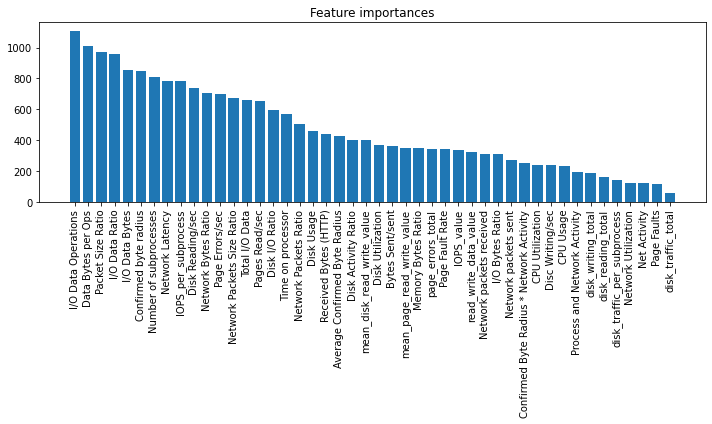

In [95]:

#model.fit(X_train, y_train['Label'])
importances = model.feature_importances_

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(train[features].shape[1]):
    print(f"{f+1}. {train[features].columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(train[features].shape[1]), importances[indices])
plt.xticks(range(train[features].shape[1]), train[features].columns[indices], rotation=90)
plt.tight_layout()
plt.show()

<a name="Preprocess"></a>
## 6. Fine Tuning

In [136]:
#make predictions on test set
def create_sub(i,model):
  test['Target'] = model.predict(test[features])
  sub = test[['ID', 'Target']]
  sub.to_csv('new_sub{}.csv'.format(i), index=False)

In [ ]:
create_sub(59)

In [ ]:
sub10 = pd.read_csv('/content/sub10.csv')
sub9 = pd.read_csv('/content/sub9.csv')

In [ ]:
pd.Series(sub10["Target"]==sub9["Target"]).value_counts()

True    3818
Name: Target, dtype: int64